In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from dolfin import *
import matplotlib.pyplot as plt
from numpy.polynomial.legendre import leggauss
import numpy as np
from ufl import tanh
import solver2D as s2

## Mesh creation

In [7]:
mesh = BoxMesh(Point(-1, -1, 0), Point(1, 1, 1), 20, 20, 10)
V = FunctionSpace(mesh, "CG", 2)

## Test Case


In [8]:
m0 = 1e-3
dt = 0.5
T = 50
save_interval = 2
times = []#[0,7/dt,14/dt,21/dt,28/dt]
doses = []#10*np.ones_like(times)
V = FunctionSpace(mesh,"P",2)
n0 = Expression("m0/(pow(2*pi,0.5)*sigma)*exp(-pow(x[2]-s0,2)/(2*sigma*sigma) - x[0]*x[0]/(2*sigma_x*sigma_x) - x[1]*x[1]/(2*sigma_x*sigma_x))",
                m0 = m0,s0 = 0.5,sigma=sqrt(0.08),sigma_x = sqrt(0.008),degree=2)
n0 = interpolate(n0,V)
c0 = interpolate(Constant(1.0), V)
path_sol = "solutions/V1e6_ref20_sigma01"

solver = s2.Solver2D(mesh, V, n0, c0, dt, T, save_interval, times, doses, path_sol)
n_vect,c_vect,mass,csc_mass,dc_mass,tdc_mass,phi_vect = solver.solve()
        

time=0: 
Solving linear variational problem.
iter=1: norm=0.73833
Solving linear variational problem.
iter=2: norm=3.8542e-05
Solving linear variational problem.
time=0.5: 
Solving linear variational problem.
iter=1: norm=3.3066e-06
Solving linear variational problem.
time=1: 
Solving linear variational problem.
iter=1: norm=4.03349e-06
Solving linear variational problem.
time=1.5: 
Solving linear variational problem.
iter=1: norm=4.92654e-06
Solving linear variational problem.
time=2: 
Solving linear variational problem.
iter=1: norm=6.02103e-06
Solving linear variational problem.
time=2.5: 
Solving linear variational problem.
iter=1: norm=7.35699e-06
Solving linear variational problem.
time=3: 
Solving linear variational problem.
iter=1: norm=8.98055e-06
Solving linear variational problem.
time=3.5: 
Solving linear variational problem.
iter=1: norm=1.09444e-05
Solving linear variational problem.
time=4: 
Solving linear variational problem.
iter=1: norm=1.33079e-05
Solving linear vari

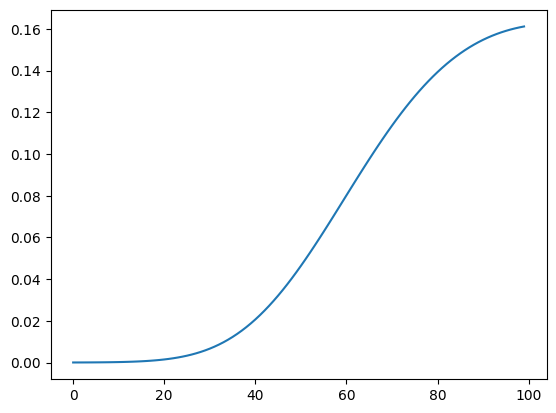

In [11]:
path_sol = "solutions/V1e6_ref20_sigma01"
mass = np.load(path_sol + '/mass.npy')
plt.plot(mass)

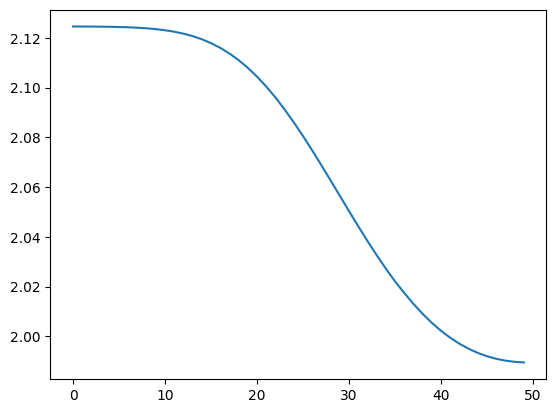

In [12]:
# oxygen level test case 1
c = Function(V)
cfile = XDMFFile(path_sol + '/c.xdmf')
ctot = []
for i in range(50):
    cfile.read_checkpoint(c,"c",i)
    ctot.append(assemble(c*dx))
plt.plot(ctot)